# Explore here

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import f_classif, SelectKBest



url = ("https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv")

In [218]:
df = pd.read_csv(url)


In [219]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [221]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [222]:
df.duplicated(['latitude', 'longitude']).sum()

np.int64(24)

Como nos da la latitud y longitud no define a que altura está, asi que puede que simplemente sea un edificio

In [223]:
df = df[df['price'] >= 0]
df['price'].min()


np.int64(0)

In [224]:

df["room_type"].unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [225]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [226]:
df.drop(['id', 'name', 'host_id', 'host_name',
         'number_of_reviews', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
"""He eliminado estas columnas porque no aportan valor al objetivo del análisis.
Las columnas de identificadores y nombres no son relevantes, 
ya que contienen valores únicos y no contribuyen a encontrar patrones relacionados con los precios o las zonas.
Por otro lado, la columna de reviews incluye únicamente el número de reseñas,
y no información cualitativa sobre la opinión de los clientes, que sería lo realmente útil para el análisis.
Por tanto, tampoco resulta necesaria para alcanzar el objetivo planteado."""

'He eliminado estas columnas porque no aportan valor al objetivo del análisis.\nLas columnas de identificadores y nombres no son relevantes, \nya que contienen valores únicos y no contribuyen a encontrar patrones relacionados con los precios o las zonas.\nPor otro lado, la columna de reviews incluye únicamente el número de reseñas,\ny no información cualitativa sobre la opinión de los clientes, que sería lo realmente útil para el análisis.\nPor tanto, tampoco resulta necesaria para alcanzar el objetivo planteado.'

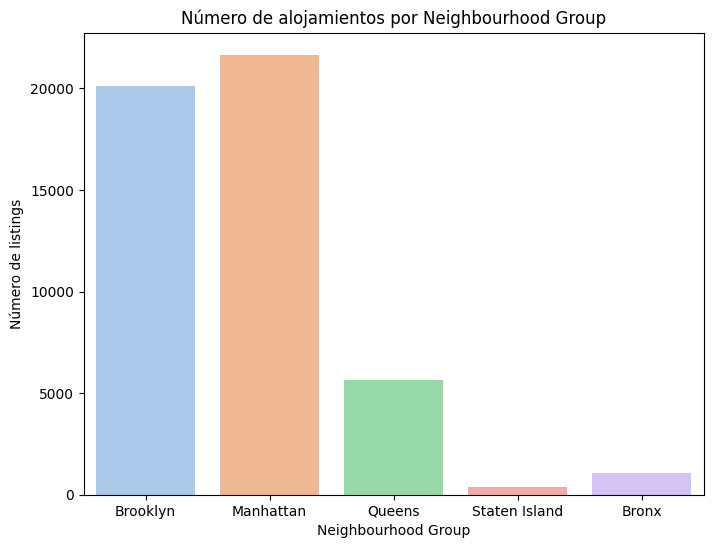

In [227]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df, 
    x='neighbourhood_group', 
    hue='neighbourhood_group',  
    dodge=False,                
    palette='pastel'
)
plt.title("Número de alojamientos por Neighbourhood Group")
plt.ylabel("Número de listings")
plt.xlabel("Neighbourhood Group")
plt.legend([],[], frameon=False)  
plt.show()


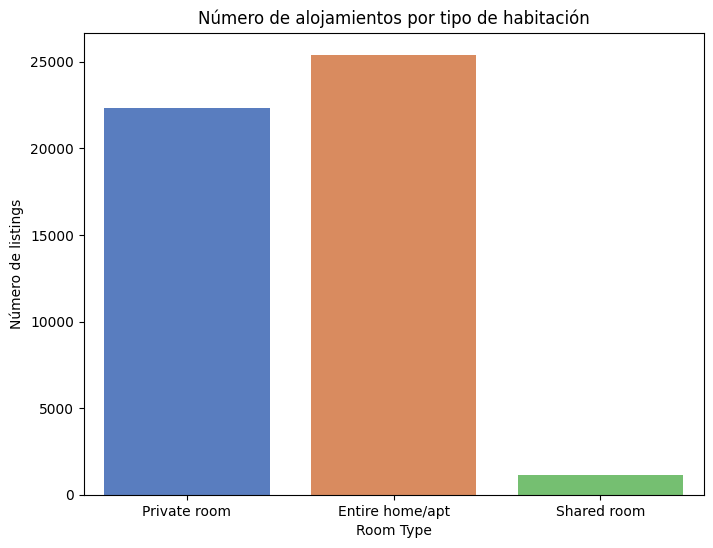

In [228]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=df, 
    x='room_type', 
    hue='room_type', 
    dodge=False, 
    palette='muted'
)
plt.title("Número de alojamientos por tipo de habitación")
plt.ylabel("Número de listings")
plt.xlabel("Room Type")
plt.legend([],[], frameon=False)
plt.show()

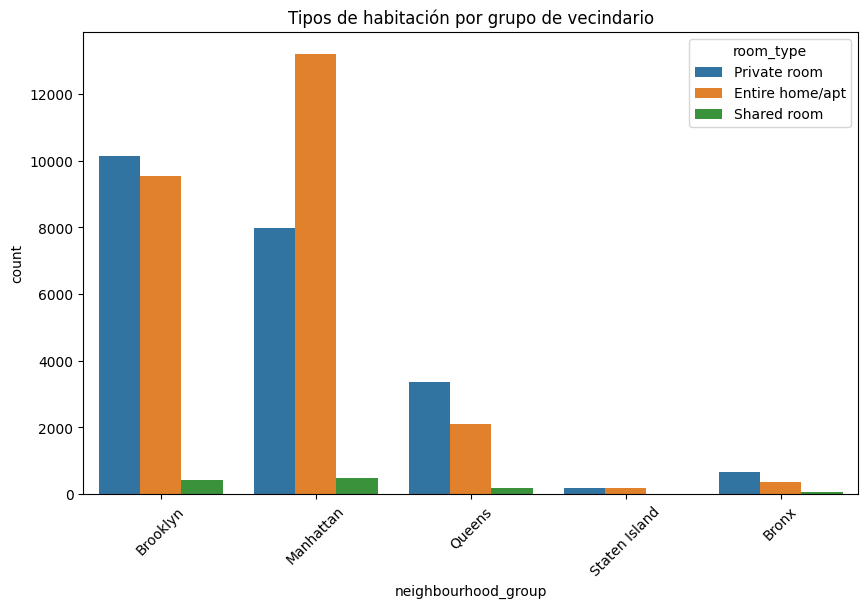

In [229]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.title("Tipos de habitación por grupo de vecindario")
plt.xticks(rotation=45)
plt.show()

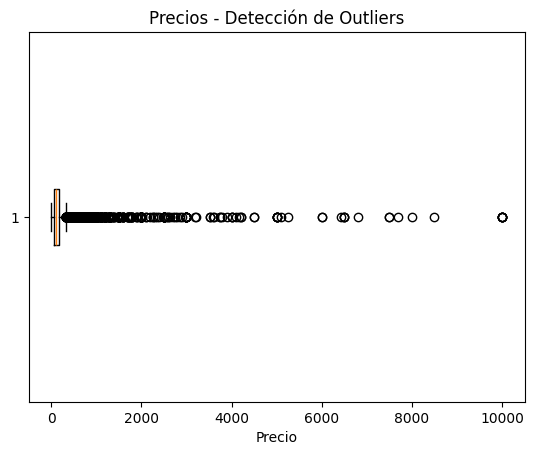

In [230]:
plt.boxplot(df['price'], vert=False)  
plt.title("Precios - Detección de Outliers")
plt.xlabel("Precio") 
plt.show()


In [231]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR


print(
    f"Los límites superior e inferior para la búsqueda de outliers son "
    f"{round(upper_limit, 2)} y {round(lower_limit, 2)}, "
    f"con un rango intercuartílico de {round(IQR, 2)}"
)



Los límites superior e inferior para la búsqueda de outliers son 493.0 y -249.0, con un rango intercuartílico de 106.0


In [232]:
df = df[df['price'] <= 500]

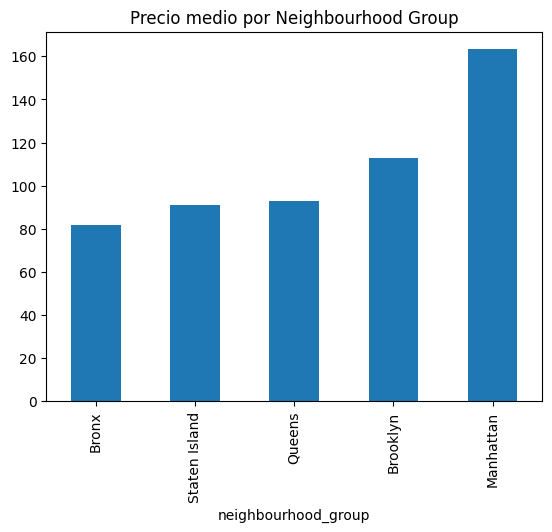

In [233]:
df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
df.groupby('neighbourhood_group')['price'].mean().sort_values().plot(kind='bar')
plt.title("Precio medio por Neighbourhood Group")
plt.show()


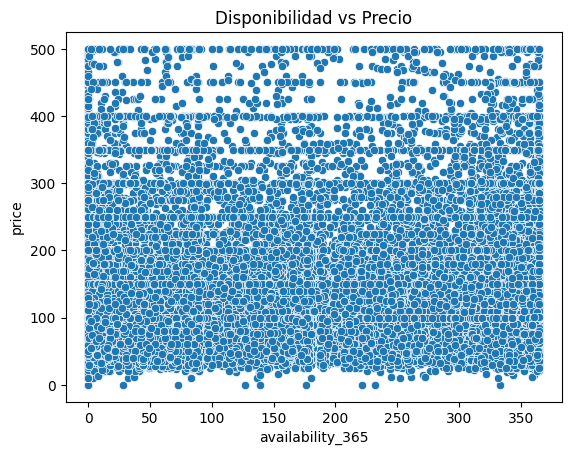

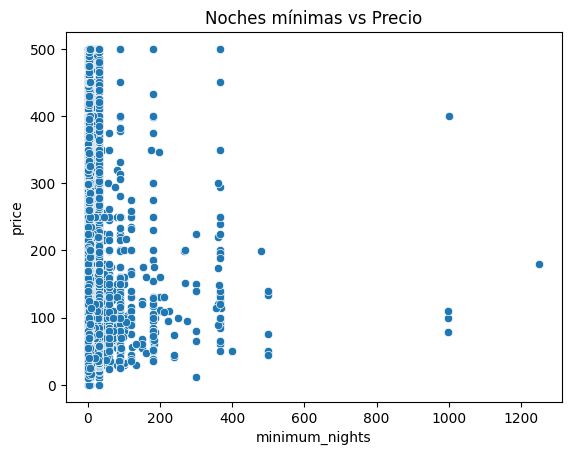

In [234]:
sns.scatterplot(data=df, x='availability_365', y='price')
plt.title("Disponibilidad vs Precio")
plt.show()

sns.scatterplot(data=df, x='minimum_nights', y='price')
plt.title("Noches mínimas vs Precio")
plt.show()


In [235]:
df = df[df['minimum_nights'] < 600]
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,6,2


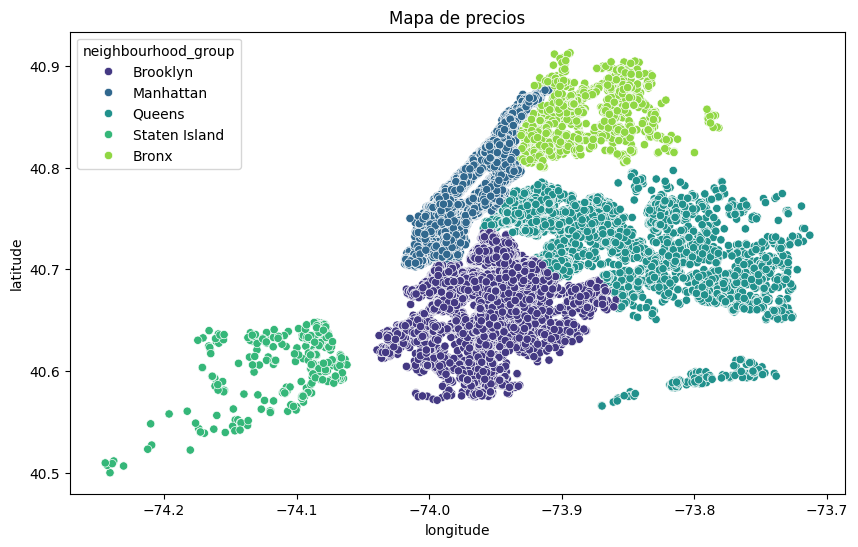

In [236]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='longitude', 
    y='latitude', 
    hue='neighbourhood_group', 
    palette="viridis", 
    alpha=1

)
plt.title("Mapa de precios")
plt.show()


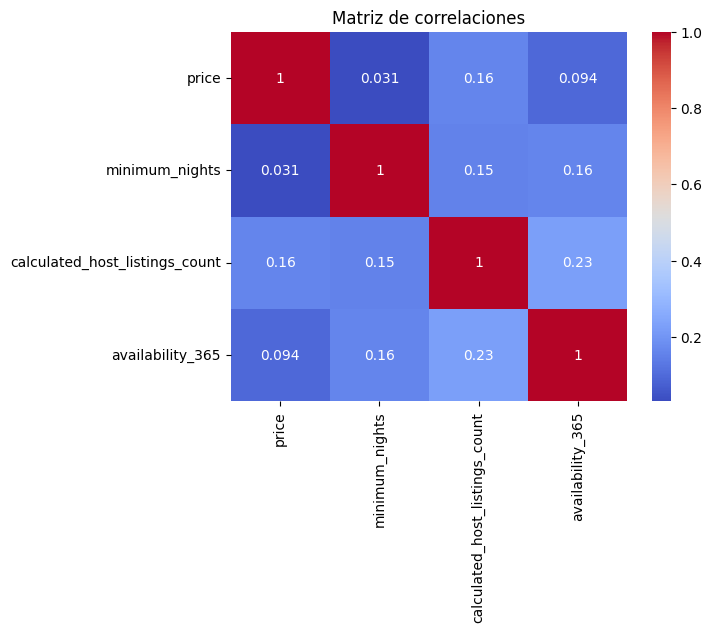

In [237]:
sns.heatmap(df[['price','minimum_nights','calculated_host_listings_count','availability_365']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Matriz de correlaciones")
plt.show()

In [238]:
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]
df["room_type_n"] = pd.factorize(df["room_type"])[0]


In [239]:
df.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365,1,2,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194,0,3,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0,1,4,1


In [240]:
df = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)

In [241]:
X = df.drop(["price"], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state= 42)

In [242]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[0.80753848, 0.56745178, 0.00200401, ..., 0.25      , 0.13761468,
        0.        ],
       [0.52194885, 0.84728041, 0.00400802, ..., 0.5       , 0.90366972,
        0.        ],
       [0.53617743, 0.53368814, 0.        , ..., 0.        , 0.05504587,
        0.5       ],
       ...,
       [0.52413041, 0.56799909, 0.        , ..., 0.        , 0.05504587,
        0.        ],
       [0.66442855, 0.55388216, 0.00801603, ..., 0.25      , 0.12844037,
        0.5       ],
       [0.73772876, 0.52294946, 0.00200401, ..., 0.25      , 0.20183486,
        0.5       ]], shape=(9570, 8))

He aplicado escalado a las variables numéricas utilizando MinMaxScaler para normalizar los valores en un rango entre 0 y 1.
Esto asegura que todas las características tengan la misma importancia en el modelo y evita que variables con valores más grandes (como el precio o la disponibilidad) dominen sobre otras con rangos menores.
El resultado final muestra un conjunto de datos escalado con dimensión (9570, 8), lo que indica que se han transformado 8 características numéricas manteniendo el mismo número de observaciones.
Tras el escalado, los modelos de Machine Learning podrán entrenarse de forma más eficiente y estable.